In [1]:
# adding scritps to path
import sys
sys.path.insert(1, '/mnt/c/Users/john/OneDrive - University of Toronto/software/sliding_twin')

In [2]:
# dependencies
import os
import numpy as np
import nilearn as nl
import nibabel as nib
import slide_twin as twin
from importlib import reload
from scipy.signal import argrelextrema, find_peaks
from nilearn.input_data import NiftiLabelsMasker

In [ ]:
# reload modules
reload(twin)

# Making Sliding Time Windows

In [6]:
# importing atlas and mask
atlas_mask = "/mnt/c/Users/john/Desktop/craddock_2012/t20.nii.gz"

nii = "/mnt/d/doctoral_thesis/Preprocessing/2364ZL/func/scrub_nuis_nl_m_t_func.nii.gz"
out = "/mnt/d/doctoral_thesis/Preprocessing/2364ZL/sliding_timewindows"

# nii_ls = ["/mnt/d/doctoral_thesis/Preprocessing/2357ZL/func/scrub_nuis_nl_m_t_func.nii.gz"]
# out_ls = ["/mnt/d/doctoral_thesis/Preprocessing/2357ZL/roi_tcourses"]

In [4]:
win=20
step=1

In [9]:
# for nii, out in zip(nii_ls, out_ls):
roi_path = os.path.join(out, "roi_tcourses.csv")
twin_path = os.path.join(out, "roi_twin.mat")
masker = NiftiLabelsMasker(labels_img=atlas_mask, standardize=True)
tcourses = masker.fit_transform(nii)

In [10]:
fc_mats, twindows  = twin.sliding_twin(tcourses, win, step, twin_path)

/home/john/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/john/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [82]:
fc_var = np.asanyarray([np.var(fc_mats[:,:,X]) for X in range(fc_mats.shape[2])])
local_max = np.transpose(argrelextrema(fc_var, np.greater))

In [88]:
# write local max to text file
lmax_path = os.path.join(out, "var_localmax.csv")
np.savetxt(lmax_path, local_max.astype(int), fmt='%i', delimiter=",")

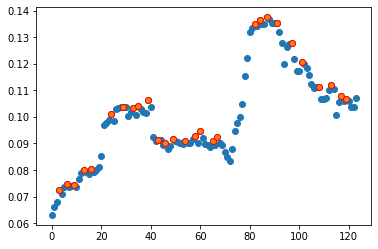

In [91]:
import matplotlib.pyplot as plt

plt.scatter(y=fc_var, x=range(len(fc_var)))
plt.scatter(y=fc_var[local_max], x=local_max, edgecolors="red")
plt.show()

This is pretty messy and includes a lot of local maxima. Consider implementing a smoothing kernel.